# Under the Hood

A look at the specifics of how conx does deep learning.

In [49]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(error='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

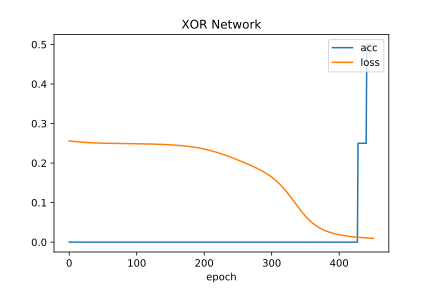

#  457 |   0.00886 |   1.00000 


In [50]:
net.reset(seed=3863479522)
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

In [51]:
import numpy as np

def sigmoid(x):
    return 1/(np.exp(-x)+1)

def my_compute_activations(vector, layer, net):
    weights, biases = net[layer].keras_layer.get_weights()
    activations = []
    for j in range(len(biases)):
        sum = 0
        for i in range(len(vector)):
            sum += (vector[i] * weights[i][j])
        a = sigmoid(sum + biases[j])
        activations.append(a)
    return activations

def my_propagate(vector, net):
    for layer in ["hidden", "output"]:
        vector = my_compute_activations(vector, layer, net)
    return vector

In [52]:
dataset

[([0, 0], [0]), ([0, 1], [1]), ([1, 0], [1]), ([1, 1], [0])]

In [53]:
for i in range(4):
    print(my_propagate(dataset[i][0], net), dataset[i][1])

[0.084041568253965457] [0]
[0.90053870156295546] [1]
[0.90790964725006384] [1]
[0.098315019019441036] [0]


In [54]:
for i in range(4):
    print(net.propagate(dataset[i][0]), dataset[i][1])

[0.08404156565666199] [0]
[0.9005386829376221] [1]
[0.9079096913337708] [1]
[0.09831503033638] [0]


In [55]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden1", shape=4, activation='sigmoid'))
net.add(Layer("hidden2", shape=2, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(error='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

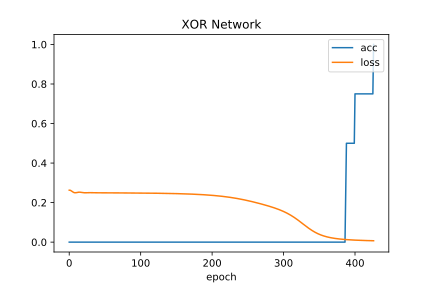

#  426 |   0.00691 |   1.00000 


In [56]:
net.reset(seed=3863479522)
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

In [57]:
def my_propagate(vector, net):
    for layer in ["hidden1", "hidden2", "output"]:
        vector = output_val(vector, layer, net)
    return vector

In [58]:
my_propagate([0, 1], net)

[0.91859862278823556]

In [59]:
net.propagate([0,1])

[0.9185985922813416]

In [61]:
my_compute_activations([0, 1], "hidden1", net)

[0.68033973590644914,
 0.78663416569471956,
 0.028392848314236552,
 0.99709843362642514]

In [62]:
h = net.propagate_from("input", [0, 1], "hidden1")
h

[0.68033975, 0.78663415, 0.028392848, 0.99709845]

In [63]:
net.propagate_from("hidden1", h, "output")

[0.91859859]